In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import warnings
import altair as alt
warnings.filterwarnings('ignore')
import os

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS
import nltk
nltk.download('punkt')

import networkx as nx
import itertools
import random


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/raunakadvani/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Storyline
1. What are these jobs and Where do they come from?
    Top 5 Cities
    Top 5 Platforms
    Top 5 Titles amd counts
    Top 5 titles and their salaries
    Pie Chart of Job Results by Query
    Job Results by Query and Degree
2. How much?
    Histogram of Salaries
    Correlational Plot Salary vs Experience
    Boxplot of Salary: Remote or not, facetted by degree
    
    
    

3. What do they look for?

In [43]:
df = pd.read_csv('../../data/job_data.csv')
df['query'] = df['query'].apply(lambda x: ' '.join(word if word == 'and' else word.title() for word in x.split()))

In [44]:
df.head(10)

Unnamed: 0                                              title  \
0           0             Ethereum Blockchain Developer (Remote)   
1           1                                Blockchain Engineer   
2           2                       Blockchain Course Instructor   
3           3  Python based - Blockchain developer to join ex...   
4           4                Blockchain DevOps Engineer (Remote)   
5           5     Ethereum Developer Remote US (Blockchain-DeFi)   
6           6         Social Media Marketing (Blockchain/Crypto)   
7           7  Senior Software Engineer - Blockchain Network ...   
8           8                               Blockchain Developer   
9           9                         DeFi Blockchain Co-Founder   

                         company_name       location           via  \
0                          Ex Populus       Anywhere      Built In   
1                               21.co   New York, NY    Greenhouse   
2  Blockchain Institute of Technology       Anywhere      LinkedIn   
3                              Upwork       Anywhere        Upwork   
4                              Telnyx  United States  Startup Jobs   
5                        Turnblock.io       Anywhere  ZipRecruiter   
6                            Bitquery       Anywhere     AngelList   
7                               Jobot       Anywhere          Dice   
8                           Atechstar  United States     OPTnation   
9                   Cryptops Exchange       Anywhere      LinkedIn   

                                         description schedule_type    salary  \
0  Company Overview:\nEx Populus is a cutting-edg...     Full-time       NaN   
1  We are seeking a highly motivated and skilled ...     Full-time  180000.0   
2  Are you a blockchain, cryptocurrency, NFT, Met...    Contractor       NaN   
3  Need someone to join our existing team to spee...    Contractor   41600.0   
4  About Telnyx\n\nAt Telnyx, we’re architecting ...     Full-time       NaN   
5  Our client is on crypto’s cutting edge technol...     Full-time  150000.0   
6  • Maintain a social media calendar\n• Build Bi...     Full-time       NaN   
7  competitive salaries, stock options, company p...     Full-time  175000.0   
8  Requirements: Strong software development back...     Full-time  141000.0   
9  Cryptops is currently looking for a Co-Founder...     Full-time       NaN   

        query                                     qualifications  \
0  Blockchain  ['2-3 years of Software Development experience...   
1  Blockchain  ["Bachelor's or Master's degree in Computer Sc...   
2  Blockchain  ['3+ years of experience in blockchain, crypto...   
3  Blockchain  ['Candidates must be willing to sign, non-disc...   
4  Blockchain  ['You are a highly motivated and experienced B...   
5  Blockchain  ['5+ years of development experience', 'Experi...   
6  Blockchain  ['English Proficiency (Written and Speaking) w...   
7  Blockchain  ['At least 5 years of experience with designin...   
8  Blockchain  ['Requirements: Strong software development ba...   
9  Blockchain  ['Can personally invest or immediately support...   

                                    responsibilities  \
0  ['Design, maintain and deploy smart contracts ...   
1  ['As a Blockchain Engineer, you will be respon...   
2  ['Our expert technical team will provide the s...   
3  ['Will discuss details with the selected candi...   
4  ['To build a best-in-class Filecoin (FIL) Mini...   
5  ['As a member of an agile engineering team, yo...   
6  ['Put our Bitquery updates and educational con...   
7  ['Rotating breakfast menu served daily', 'Dinn...   
8                                                NaN   
9  ['Other decentralized derivatives exchanges re...   

                                            benefits      degree  experience  \
0                                                NaN         NaN         2.5   
1  ['(NYC only) Pursuant to Section 8-102 of titl...    Master's         NaN

In [111]:

# Get the top 15 companies by count
top_15_companies = df['company_name'].value_counts()[:15].index.tolist()

# Create a dictionary to store the unique nodes
node_dict = {}

# Create lists to store the source and target for each link
source = []
target = []

# Loop through each row in the DataFrame
for index, row in df.iterrows():
    # Check if the company is in the top 15 companies list
    if row['company_name'] in top_15_companies:
        # Check if the query is already a node
        if row['query'] not in node_dict:
            # Add the query as a new node to the node dictionary
            node_dict[row['query']] = len(node_dict)
        # Check if the company is already a node
        if row['company_name'] not in node_dict:
            # Add the company as a new node to the node dictionary
            node_dict[row['company_name']] = len(node_dict)
        # Append the source and target to their respective lists
        source.append(node_dict[row['query']])
        target.append(node_dict[row['company_name']])

# Create a list of node labels
node_labels = list(node_dict.keys())

# Create the Sankey diagram trace
trace = go.Sankey(node=dict(label=node_labels),
                  link=dict(source=source, target=target))


# Create the layout
layout = go.Layout(title='Query-Company Relationships',
                   font=dict(size=10))

# Create the figure
fig = go.Figure(data=[trace], layout=layout)

# Show the figure
fig.show()



IsADirectoryError: [Errno 21] Is a directory: '../../website/plots'

In [116]:
os.getcwd()

'/Users/raunakadvani/2023-anly503-ra1113/spring-2023-scholarship-project-ra1113/code/data_visualization'

In [117]:
# Filter out rows with location "Anywhere" or "United States"
df_filtered = df[~df['location'].isin(['Anywhere', 'United States'])]

# Group by location and count the number of jobs
grouped_df = df_filtered.groupby('location')['title'].count().reset_index()

# Get the top 5 locations by job count
top_5 = grouped_df.nlargest(5, 'title')

# Create a bar plot using Plotly
fig = go.Figure(data=[go.Bar(x=top_5['location'], y=top_5['title'],
                             hovertemplate='City: %{x}<br>Number of jobs: %{y}',
                             name = '')])
fig.update_layout(title='Top 5 Locations by Job Count',
                  xaxis_title='Location', yaxis_title='Job Count',
                  template='plotly_dark')
fig.show()

fig.write_html("../../website/plots/plot-1.html")

In [60]:
# Group by via and count the number of jobs
grouped_df = df_filtered.groupby('via')['title'].count().reset_index()

# Get the top 5 via values by job count
top_5 = grouped_df.nlargest(5, 'title')

# Create a bar plot using Plotly
fig = go.Figure(data=[go.Bar(x=top_5['via'], y=top_5['title'],
                             hovertemplate='Posting Site: %{x}<br>Number of jobs: %{y}',
                             name = '')])
fig.update_layout(title='Top 5 Job Posters by Job Count',
                  xaxis_title='', yaxis_title='Job Count',
                  template='plotly_dark')
fig.show()

In [56]:
# Group by title and count the number of jobs
grouped_df = df_filtered.groupby('title')['location'].count().reset_index()

# Get the top 5 titles by job count
top_5 = grouped_df.nlargest(5, 'location')

# Create a bar plot using Plotly
fig = go.Figure(data=[go.Bar(x=top_5['title'], y=top_5['location'],
                             hovertemplate='Title: %{x}<br>Number of jobs: %{y}',
                             name = '')])
fig.update_layout(title='Top 5 Job Titles by Job Count',
                  xaxis_title='Job Title', yaxis_title='Job Count',
                  template='plotly_dark')
fig.show()

In [63]:
# Get the top 5 most occurring job titles
top_5_titles = df['title'].value_counts().nlargest(5).index.tolist()

# Filter the dataframe to only include the top 5 titles
df_filtered = df[df['title'].isin(top_5_titles)]

# Get the average salary for each title
grouped_df = df_filtered.groupby('title')['salary'].mean().reset_index()

# Create a bar plot using Plotly
fig = go.Figure(data=[go.Bar(x=grouped_df['title'], y=grouped_df['salary'],
                             hovertemplate='Title: %{x}<br>Average Salary: %{y:$,.2f}',
                             name='')])
fig.update_layout(title='Top 5 Most Occurring Job Titles by Average Salary',
                  xaxis_title='Job Title', yaxis_title='Average Salary',
                  template='plotly_dark')
fig.show()

In [64]:
# Count the number of jobs for each query
query_counts = df['query'].value_counts()

# Create the pie chart trace
pie_trace = go.Pie(
    labels=query_counts.index.tolist(),
    values=query_counts.tolist(),
    hovertemplate='Query: %{label}<br>Count: %{value}',
    name = ""
)

# Create the layout for the pie chart
layout = go.Layout(
    title='Percentage of Job Results, by Query',
    width = 800,
    template="plotly_dark"
)

# Create the figure object
fig = go.Figure(data=[pie_trace], layout=layout)

# Facet the pie chart by the 'query' column
#fig.for_each_trace(lambda trace: trace.update(title=''))

# Display the figure
fig.show()


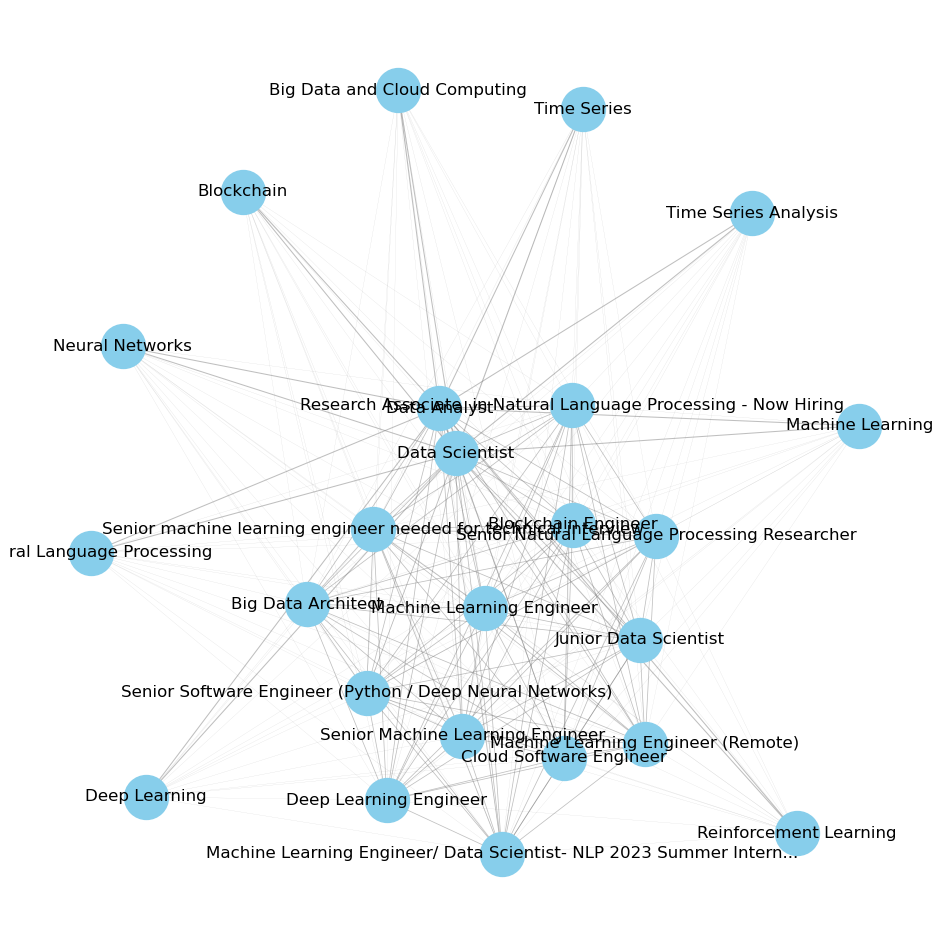

In [110]:


# create a co-occurrence matrix between job titles and queries
cooc_mat = pd.crosstab(df['title'], df['query'])

# downsample to only keep the top 15 most common queries
top_queries = cooc_mat.sum(axis=0).sort_values(ascending=False)[:15].index
cooc_mat = cooc_mat[top_queries]

# downsample to only keep the top 30 most common job titles
top_titles = cooc_mat.sum(axis=1).sort_values(ascending=False)[:15].index
cooc_mat = cooc_mat.loc[top_titles]

# create a NetworkX graph object
G = nx.Graph()

# add nodes for each job title and query
G.add_nodes_from(top_titles, bipartite=0)
G.add_nodes_from(top_queries, bipartite=1)

# add edges between job titles and queries based on the co-occurrence matrix
edges = [(title, query, cooc_mat.loc[title, query]) for title in top_titles for query in top_queries]
G.add_weighted_edges_from(edges)

# project the graph onto the job titles nodes to create a job title co-occurrence network
P = nx.bipartite.weighted_projected_graph(G, top_titles)

# create a layout for the nodes in the job title co-occurrence network
pos = nx.spring_layout(P, seed=42)

# draw the job title co-occurrence network
plt.figure(figsize=(12, 12))
nx.draw_networkx_nodes(P, pos, node_color='skyblue', node_size=1000)
nx.draw_networkx_edges(P, pos, edge_color='gray', alpha=0.5, width=[d['weight']/20 for (u,v,d) in P.edges(data=True)])
nx.draw_networkx_labels(P, pos, font_size=12, font_family='sans-serif')
plt.axis('off')
plt.show()


In [67]:
# group the data by query and degree, and count the number of jobs
df_grouped = df.groupby(['query', 'degree']).size().reset_index(name='count')

# define the colors for each degree
colors = {'Bachelor\'s': 'rgb(31, 119, 180)', 'Master\'s': 'rgb(255, 127, 14)', 'PhD': 'rgb(44, 160, 44)'}

# create a trace for each degree
traces = []
for degree in df_grouped['degree'].unique():
    trace = go.Bar(
        x=df_grouped[df_grouped['degree'] == degree]['query'],
        y=df_grouped[df_grouped['degree'] == degree]['count'],
        name=degree,
        marker=dict(color=colors[degree]),
        hovertemplate='Query: %{x} '+ '<br>Count: %{y}'
    )
    traces.append(trace)

# set the layout for the chart
layout = go.Layout(
    title='Number of Job Results, by Query and Degree Required',
    barmode='group',
    template="plotly_dark",
    xaxis=dict(title='Query'),
    yaxis=dict(title='Count')
)

# create the figure object and plot it
fig = go.Figure(data=traces, layout=layout)
fig.show()


In [73]:

# Create a histogram using Plotly
fig = go.Figure(data=[go.Histogram(x=df['salary'], nbinsx=15)])

# Update the layout of the figure
fig.update_layout(title='Distribution of Salaries for Data Related Jobs',
                  xaxis_title='Salary', yaxis_title='Count',
                  template='plotly_dark')

# Show the figure
fig.show()

In [66]:
# Define the trace for each degree
traces = []
for degree in df['degree'].unique():
    trace = go.Scatter(
        x=df[df['degree'] == degree]['experience'],
        y=df[df['degree'] == degree]['salary'],
        mode='markers',
        name=degree,
        marker=dict(size=8)
    )
    traces.append(trace)

# Define the layout
layout = go.Layout(
    title='Correlational Plot between Experience and Salary, by Degree Required',
    xaxis=dict(title='Experience (Years)'),
    yaxis=dict(title='Salary (USD)'),
    template = 'plotly_dark'
)

# Create the figure object and plot it
fig = go.Figure(data=traces, layout=layout)
fig.show()

In [40]:

# Group the data by 'remote'
grouped_df = df.groupby('remote')

# Create the figure object
fig = go.Figure()

# Add the box traces for the remote groups
for remote, group_df in grouped_df:
    fig.add_trace(go.Box(
        y=group_df.loc[group_df['remote'] == remote, 'salary'],
        name=str(remote),
        marker_color='indianred' if remote else 'lightseagreen'))

# Create the dropdown menu options
dropdown_options = [
    {'label': 'Remote', 'value': 'remote'},
    {'label': "Bachelor's", 'value': "Bachelor's"},
    {'label': "Master's", 'value': "Master's"},
    {'label': 'PhD', 'value': 'PhD'}
]

# Define the update menu
updatemenu = go.layout.Updatemenu(
    buttons=[
        dict(label=option['label'],
             method='update',
             args=[{'y': [df.loc[(df['remote'] == True) & (df['degree'] == option['value']), 'salary'],
                           df.loc[(df['remote'] == False) & (df['degree'] == option['value']), 'salary']]},
                   {'yaxis': {'title': 'Salaries for {} Holders'.format(option['value'])}}])
        for option in dropdown_options[1:]
    ],
    direction='down',
    showactive=True,
    x=1,
    y=1.2
)

# Add the updatemenu to the layout
fig.update_layout(updatemenus=[updatemenu])

# Define the layout
fig.update_layout(
    title='Salaries by Remote Work Status, for Different Degree Requirements',
    xaxis=dict(title='Work Remotely?'),
    yaxis=dict(title='Salaries for Bachelor\'s Holders'),
    template="plotly_dark"
)

# Show the figure
fig.show()


In [43]:
df['query'].value_counts()

blockchain                      90
natural language processing     90
big data and cloud computing    90
data analyst                    90
machine learning                90
reinforcement learning          90
neural networks                 90
deep learning                   90
data scientist                  90
time series analysis             7
time series                      6
Name: query, dtype: int64

In [15]:
alt.Chart(df).mark_bar().encode(
    alt.X('salary:Q', bin=True),
    y='count()'
)

alt.Chart(...)

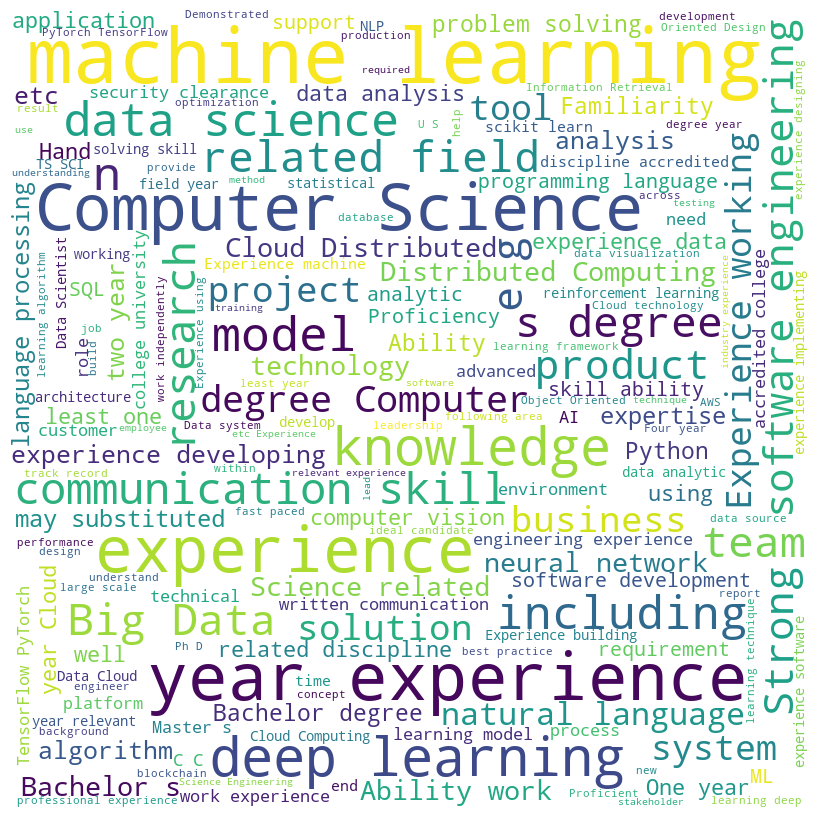

In [20]:
# combine the text in the 'qualifications' column into one long string
text = ' '.join(df['qualifications'])

# tokenize the text
tokens = word_tokenize(text)

# remove stop words
stop_words = set(stopwords.words('english'))
tokens = [token for token in tokens if not token in stop_words]

# lemmatize the tokens
lemmatizer = WordNetLemmatizer()
tokens = [lemmatizer.lemmatize(token) for token in tokens]

# generate the wordcloud
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = set(STOPWORDS), 
                min_font_size = 10).generate(' '.join(tokens))

# plot the wordcloud
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 

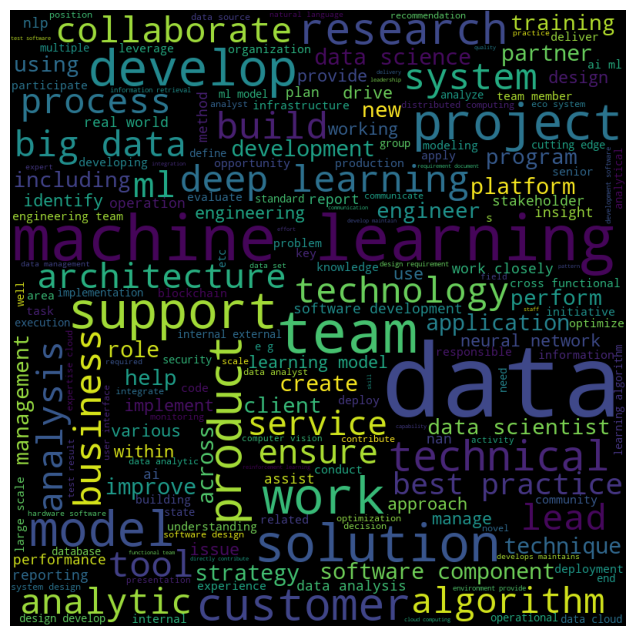

In [31]:

# drop rows with missing values in the qualifications column
df.dropna(subset=['responsibilities'], inplace=True)

# tokenize, remove stop words and lemmatize the words
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

df['responsibilities'] = df['responsibilities'].astype(str)
df['responsibilities'] = df['responsibilities'].apply(lambda x: [lemmatizer.lemmatize(w.lower()) for w in word_tokenize(x) if w.lower() not in stop_words])

# create the word cloud
text = ' '.join(df['responsibilities'].sum())
wordcloud = WordCloud(width=800, height=800).generate(text)

# display the word cloud
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud) #, interpolation='bilinear')
plt.axis("off")
plt.show()


In [42]:
df['title'].value_counts()

[data, analyst]                                                               22
[data, scientist]                                                             21
[machine, learning, engineer]                                                 20
[deep, learning, engineer]                                                    14
[blockchain, engineer]                                                        10
                                                                              ..
[senior, machine, learning, perception, engineer]                              1
[hewlett, packard, lab, -, machine, learning, research, scientist, ...]        1
[hewlett, packard, lab, -, machine, learning, research, associate, intern]     1
[need, expert, consult, gnns, (, graph, neural, network, ...]                  1
[natural, language, processing, engineer]                                      1
Name: title, Length: 454, dtype: int64

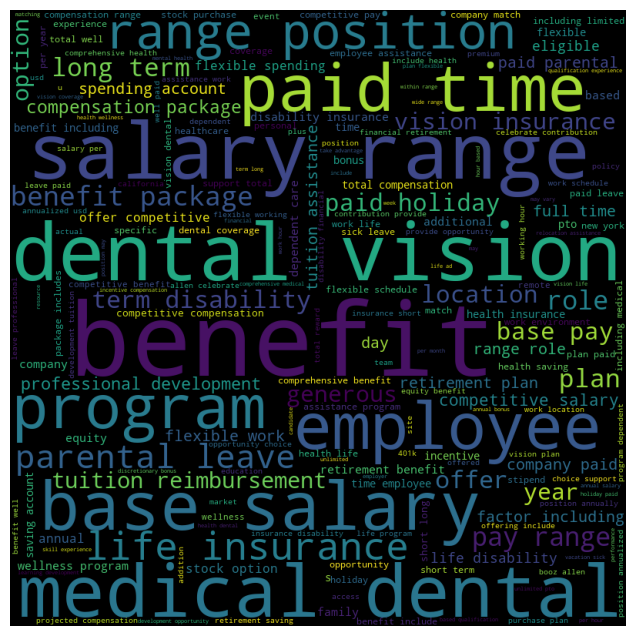

In [32]:

# drop rows with missing values in the qualifications column
df.dropna(subset=['benefits'], inplace=True)

# tokenize, remove stop words and lemmatize the words
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

df['benefits'] = df['benefits'].astype(str)
df['benefits'] = df['benefits'].apply(lambda x: [lemmatizer.lemmatize(w.lower()) for w in word_tokenize(x) if w.lower() not in stop_words])

# create the word cloud
text = ' '.join(df['benefits'].sum())
wordcloud = WordCloud(width=800, height=800).generate(text)

# display the word cloud
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud) #, interpolation='bilinear')
plt.axis("off")
plt.show()


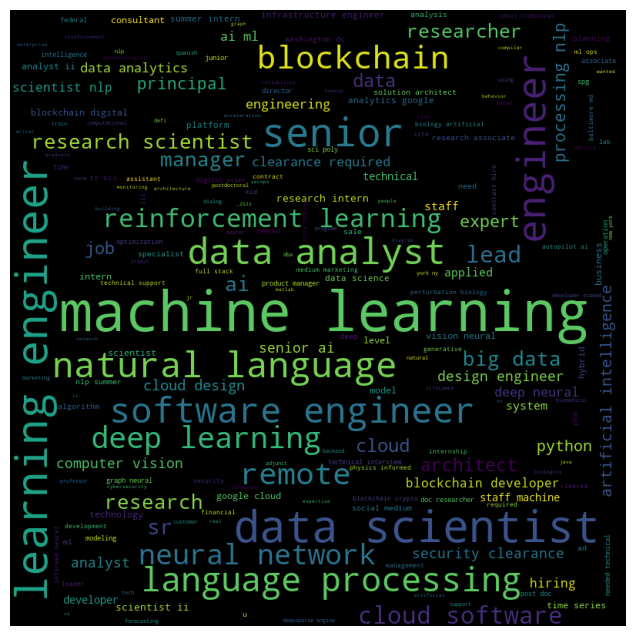

In [39]:

# drop rows with missing values in the qualifications column
df.dropna(subset=['title'], inplace=True)

# tokenize, remove stop words and lemmatize the words
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

df['title'] = df['title'].astype(str)
df['title'] = df['title'].apply(lambda x: [lemmatizer.lemmatize(w.lower()) for w in word_tokenize(x) if w.lower() not in stop_words])

# create the word cloud
text = ' '.join(df['title'].sum())
wordcloud = WordCloud(width=800, height=800).generate(text)

# display the word cloud
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud) #, interpolation='bilinear')
plt.axis("off")
plt.show()
